#### importing The Librarey

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle 

#### Data Loading and Understanding

In [2]:
# load teh csv data to a pandas dataframe
df = pd.read_csv(r"C:\Users\rahul\Documents\Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.size

140000

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
pd.set_option("display.max_columns",None)
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().values.any()

np.False_

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [11]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print("")

RowNumber
[    1     2     3 ...  9998  9999 10000]

CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]

Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 71

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [14]:
df.iloc[0:4]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [15]:
df.loc[:, "CustomerId"]

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

### Data Visulization

C:\Users\rahul\AppData\Local\Temp\ipykernel_20400\943675451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


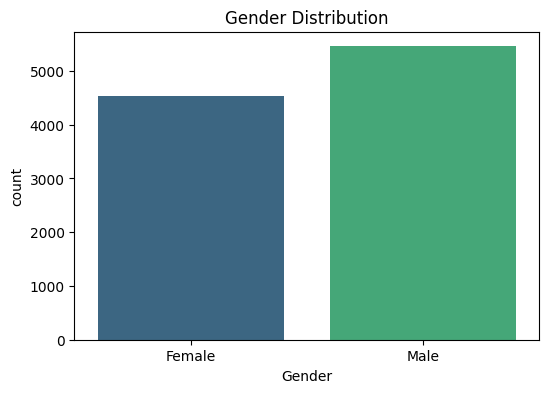

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Distribution')
plt.show()

C:\Users\rahul\AppData\Local\Temp\ipykernel_20400\1743354890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Geography', data=df, palette='viridis')


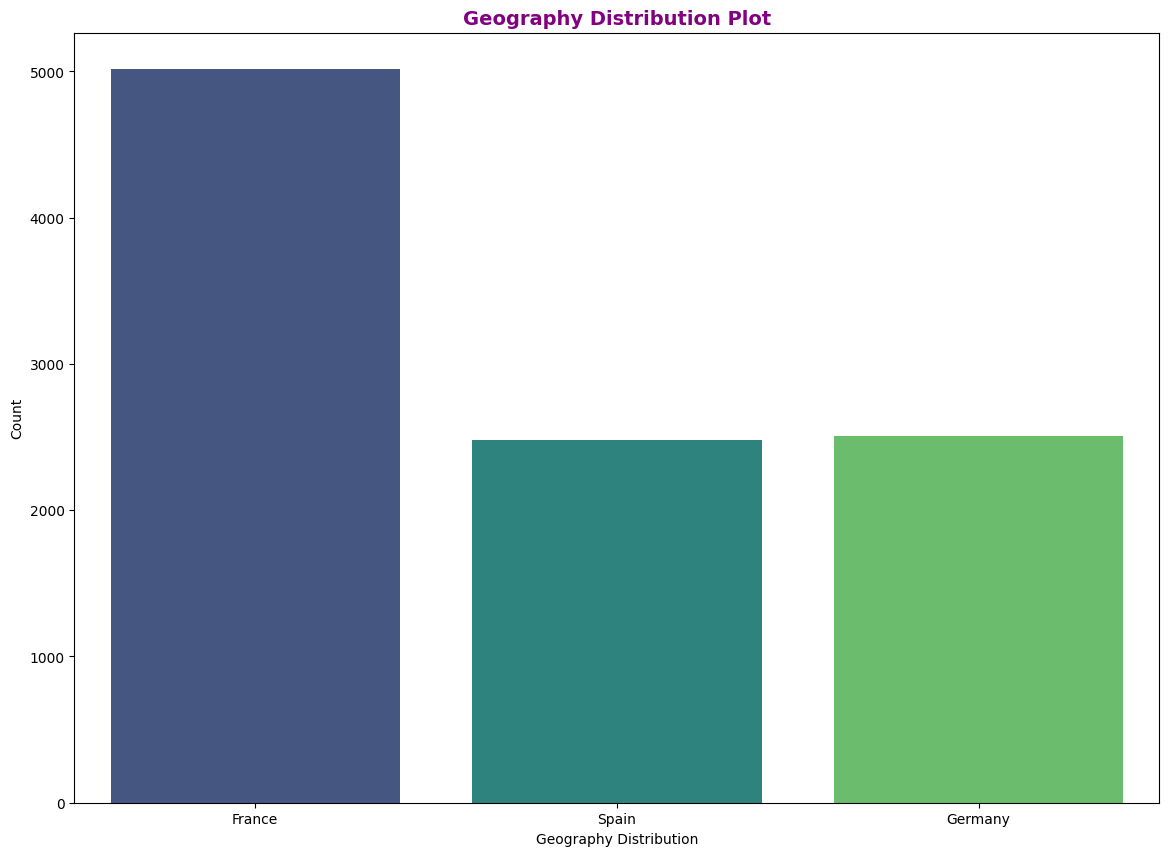

In [17]:
plt.figure(figsize=(14,10))
sns.countplot(x='Geography', data=df, palette='viridis')
plt.xlabel('Geography Distribution')
plt.ylabel('Count')
plt.title('Geography Distribution Plot', fontsize=14, fontweight="bold", color="purple")
plt.show()

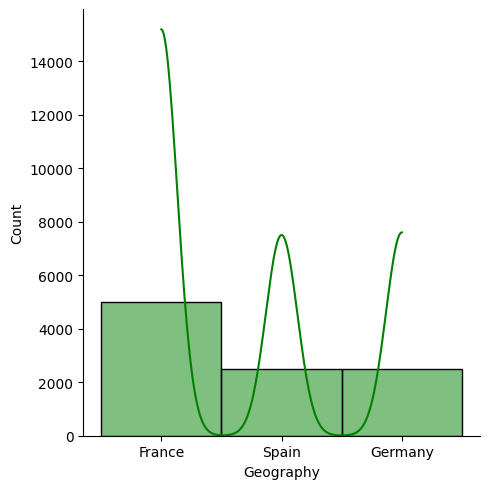

In [18]:
sns.displot(df.Geography, kde =True, color = "green")

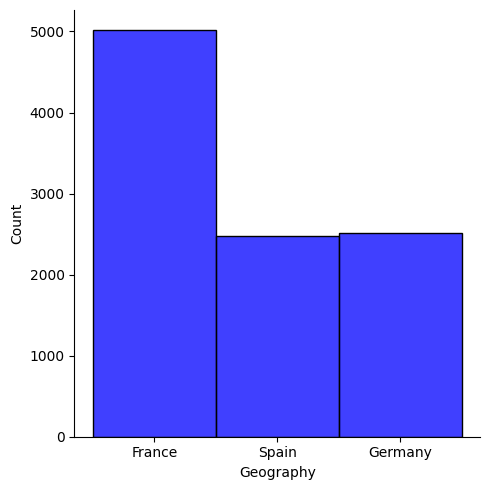

In [19]:
sns.displot(df.Geography, color = "blue")

C:\Users\rahul\AppData\Local\Temp\ipykernel_20400\2980376898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = count1, y = count1.index, orient = 'h', palette='viridis')


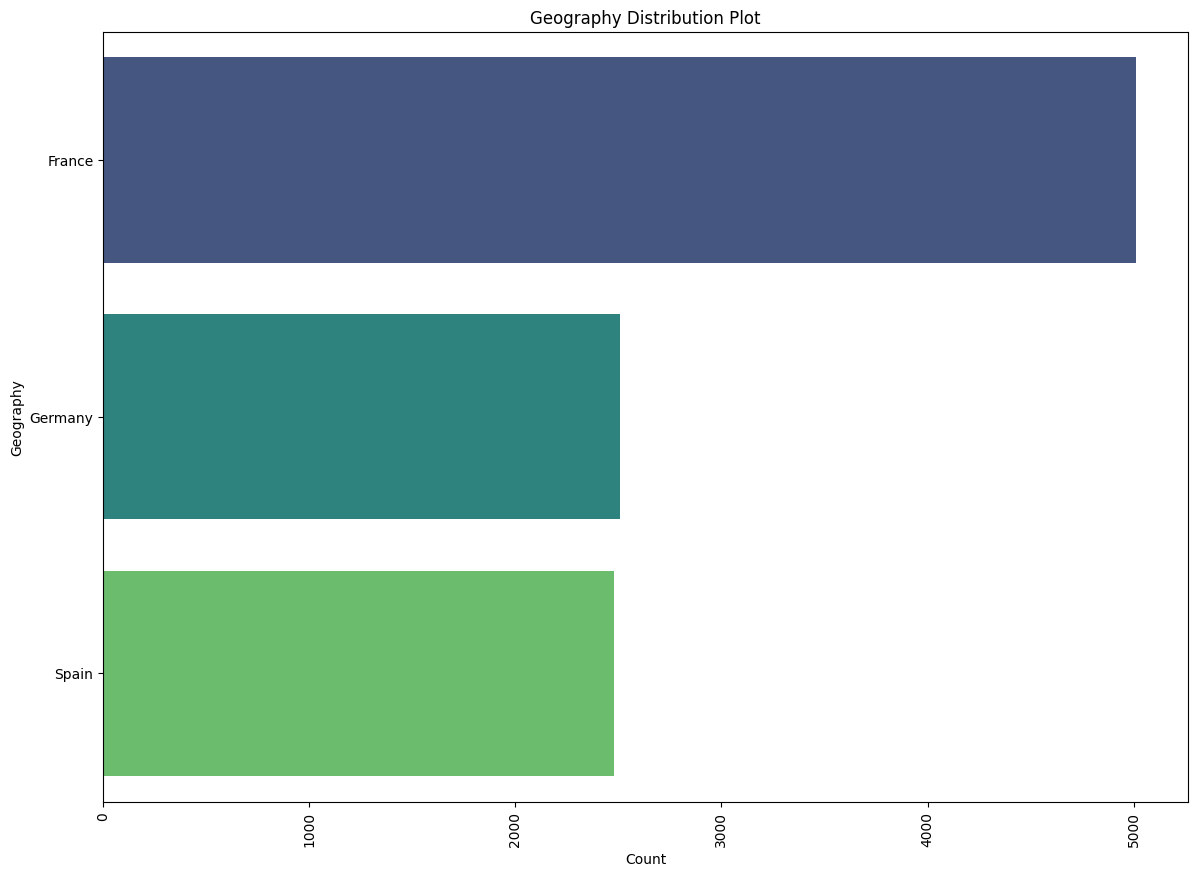

In [20]:
plt.figure(figsize = (14,10))
count1 = df.Geography.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Geography')
plt.title('Geography Distribution Plot')
plt.xticks(rotation=90)
plt.show()

C:\Users\rahul\AppData\Local\Temp\ipykernel_20400\1262595836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count1, y=count1.index, orient='h', palette='viridis')


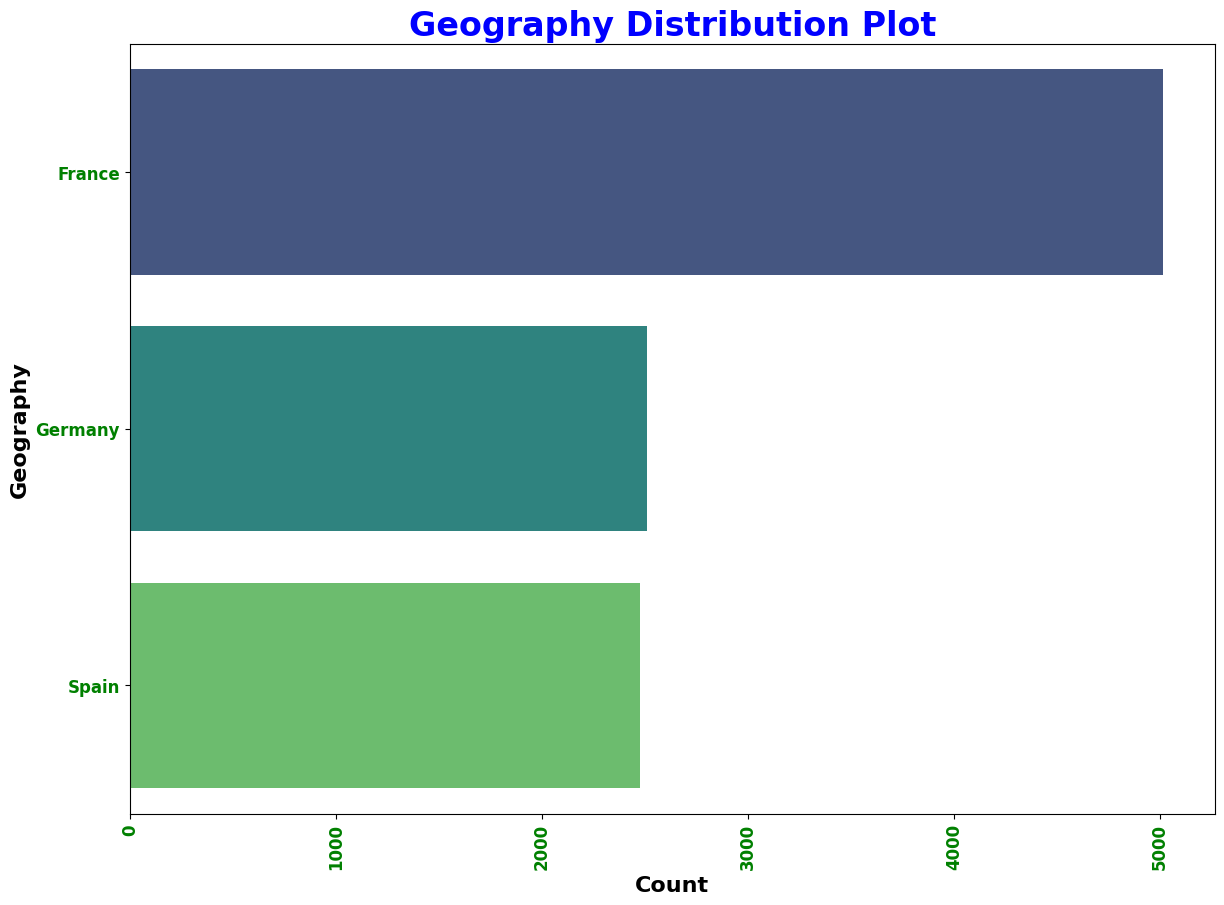

In [21]:
plt.figure(figsize=(14, 10))
count1 = df.Geography.value_counts()
sns.barplot(x=count1, y=count1.index, orient='h', palette='viridis')
plt.xlabel('Count', fontsize=16, fontweight='bold')
plt.ylabel('Geography', fontsize=16, fontweight='bold')
plt.title('Geography Distribution Plot', fontsize=24, fontweight='bold', color='blue')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='green')
plt.yticks(fontsize=12, fontweight='bold', color='green')
plt.show()

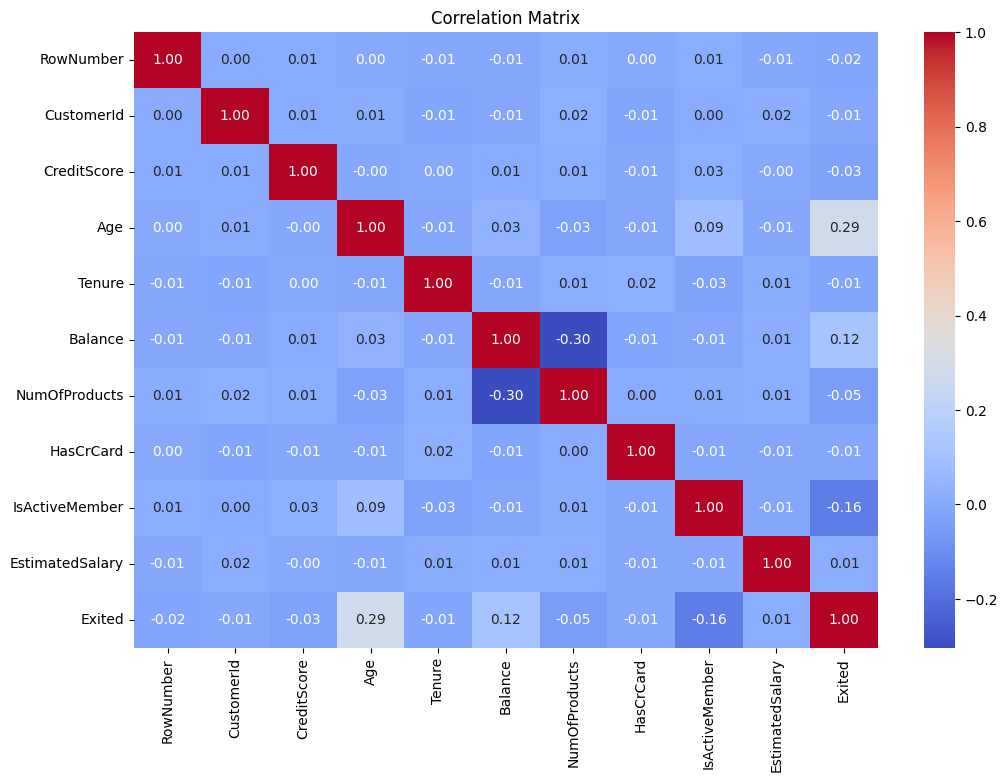

In [22]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Preprocess the data

In [23]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.drop(labels = ["RowNumber","CustomerId", "Surname"], axis = 1, inplace=True)

In [25]:
df = pd.get_dummies(df, drop_first = True)

In [26]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [27]:
X = df.drop("Exited", axis = 1)
y = df["Exited"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

### Train Logistic Regression Model

In [30]:
lr_model = LogisticRegression()

In [31]:
lr_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
lr_predictions = lr_model.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score


In [34]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))
print("Precision_score: ", precision_score(y_test, lr_predictions))
print("Recall_score: ", recall_score(y_test, lr_predictions))
print("f1_score: ", f1_score(y_test, lr_predictions))

Logistic Regression Model:
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy:  0.811
r2_Score:  -0.19705296959390473
Precision_score:  0.5524475524475524
Recall_score:  0.2010178117048346
f1_score:  0.2947761194029851


### Train Random Forests Model

In [35]:
rf_model = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)

In [36]:
rf_model.fit(X_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
rf_predictions = rf_model.predict(X_test)

In [38]:
print("Random Forest Model:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))
print("r2_Score: ", r2_score(y_test, rf_predictions))
print("Precision_score: ", precision_score(y_test, rf_predictions))
print("Recall_score: ", recall_score(y_test, rf_predictions))
print("f1_score: ", f1_score(y_test, rf_predictions))

Random Forest Model:
[[1547   60]
 [ 209  184]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy:  0.8655
r2_Score:  0.1481289713736499
Precision_score:  0.7540983606557377
Recall_score:  0.4681933842239186
f1_score:  0.5777080062794349


### Train Gradient Boosting Model

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.02, max_depth = 1, random_state=42)

In [41]:
gb_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.02
,n_estimators,1000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,1
,min_impurity_decrease,0.0
,init,None


In [42]:
gb_predictions = gb_model.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [44]:
print("Gradient Boosting Model:")
print(confusion_matrix(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))
print("Accuracy: ", accuracy_score(y_test, gb_predictions))
print("r2_Score: ", r2_score(y_test, gb_predictions))
print("Precision_score: ", precision_score(y_test, gb_predictions))
print("Recall_score: ", recall_score(y_test, gb_predictions))
print("f1_score: ", f1_score(y_test, gb_predictions))

Gradient Boosting Model:
[[1550   57]
 [ 224  169]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.75      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy:  0.8595
r2_Score:  0.11012728979924014
Precision_score:  0.7477876106194691
Recall_score:  0.4300254452926209
f1_score:  0.5460420032310178
